In [1]:
using Plots
using Graphs
using GraphPlot

# Lucas Schmidt Ferreira de Araujo

In [2]:
function Binary( number::Int )
    value = zeros(Int,8)
    div = number
    for q in 1:8
        value[8-q+1] = div % 2
        div = div ÷ 2
    end
    return value
end

function Binary_Decimal( bin::Vector{Int} )
    count = bin[1]
    for q in 1:length(bin)-1
        count = 2 * count + bin[q+1] 
    end
    return count
end

function Configuration( left::Bool , center::Bool , right::Bool , bin::BitVector )
    conf =[left,center,right]
    if( conf == [true,true,true] )
        return bin[1]
    elseif ( conf == [true , true  , false])
        return bin[2]
    elseif ( conf == [true , false , true])
        return bin[3]
    elseif ( conf == [true ,false , false])
        return bin[4]
    elseif ( conf == [false , true , true] )
        return bin[5]
    elseif ( conf == [false , true , false] )
        return bin[6]
    elseif ( conf == [false , false , true] )
        return bin[7]
    elseif( conf == [false , false , false] )
        return bin[8] 
    end
end

function Rule( number::Int , initial_state::Vector{Bool} )
    bin = Bool.( Binary(number) )
    n = length(initial_state)
    states = zeros(Bool, n, n)
    states[1, :] = initial_state
    for t in 1:n-1
        left  = circshift(states[t, :],  1) 
        right = circshift(states[t, :], -1)
        center = states[t, : ]
        states[t+1, :] = Configuration.(left,center,right,Ref(bin))
    end
    return states
end

function active_boundaries(vec::Vector{Bool})
    count = 0
    s = vec[1]
    for q in vec
        if( q != s )
            count += 1
            s = q
        end
    end
    return count
end

function Next_State( rule::Int , State::BitVector )
    bin = Bool.( Binary(rule) )
    left  = circshift(State,  1)
    center = State
    right = circshift(State , -1)
    return Configuration.(left,center,right,Ref(bin))
end

function Phase_Graph( rule::Int , degrees_freedom::Int = 256)
    states = [ Bool.(Binary(q)) for q in 0:degrees_freedom ]
    G = Graph(degrees_freedom)
    for q in 1:degrees_freedom
        next_state = Binary_Decimal( Int.(Next_State( rule , states[q] )) )
        add_edge!(G , q-1 , next_state)
    end
    return G
end

function mkplot( rule::Int , nsteps::Int )
    initial_state_1 = zeros(Bool,nsteps) 
    initial_state_1[ nsteps ÷ 2] = true
    initial_state_2 = rand([true,false],nsteps);

    states1 = Rule( rule ,initial_state_1)
    states2 = Rule( rule ,initial_state_2)

    ones1 = sum( states1 , dims = 2)
    diff1 = sum(abs.(states1[2:end , :] .- states1[1:end-1 , :]) , dims = 2)
    actbonds1 = map( x -> active_boundaries(states1[x,:])  , 1:nsteps )

    ones2 = sum( states2 , dims = 2) 
    diff2 = sum(abs.(states2[2:end , :] .- states2[1:end-1 , :]) , dims = 2)
    actbonds2 = map( x -> active_boundaries(states2[x,:])  , 1:nsteps )

    p1 = heatmap( reverse(states1,dims=1) )#, size = (600,600))
    p2 = heatmap( reverse(states2,dims=1) )#, size = (600,600))
    
    p3 = plot( ones1 , label = "Ones")
    plot!(diff1 , label = "Diff")
    plot!(actbonds1 , label = "Active Bounds")

    p4 = plot( ones2 , label = "Ones")
    plot!(diff2 , label = "Diff")
    plot!(actbonds2 , label = "Active Bounds")
    plot(p1,p2,p3,p4,size=(1000,700))
    return plot(p1,p2,p3,p4,size=(1000,700) , suptitle = "Rule $(rule)")
end

mkplot (generic function with 1 method)

## Rule 30 - $(00011110)_2$

$$ c' = c_{\text{left}} \oplus (c_{\text{self}} \lor c_{\text{right}}) $$

In [3]:
### An alternative Implementation
function rule30(initial_state::Vector{Int})
    n = length(initial_state)
    states = zeros(Int, n, n)
    states[1, :] = initial_state

    for t in 1:n-1
        left  = circshift(states[t, :],  1) 
        right = circshift(states[t, :], -1)
        states[t+1, :] = xor.(left , (states[t, :] .| right) )
    end

    return states
end

rule30 (generic function with 1 method)

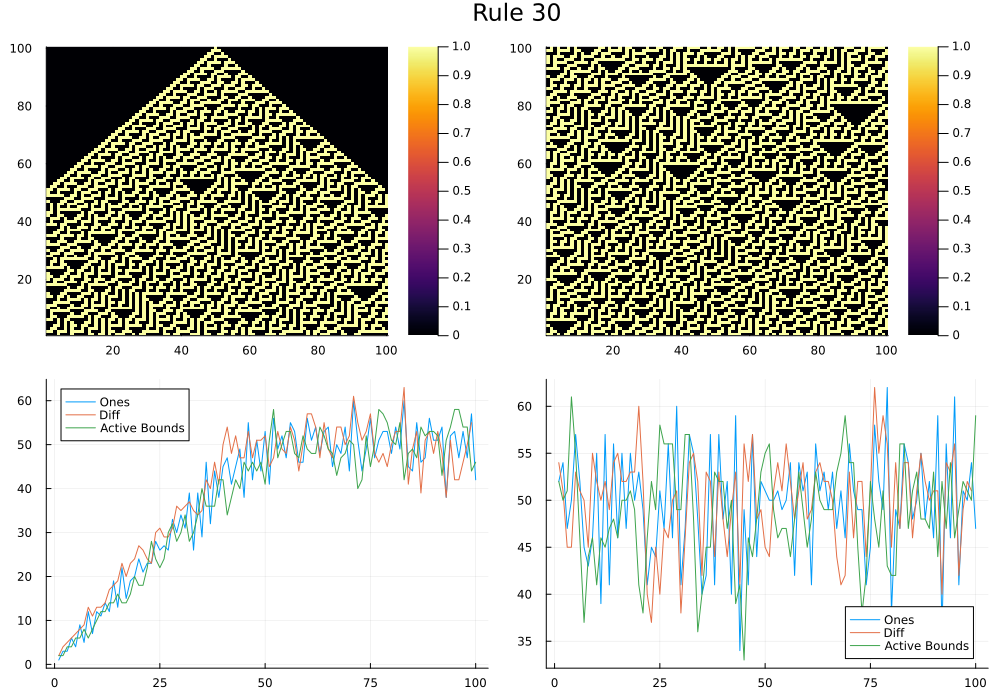

In [4]:
G = Phase_Graph(30)
mkplot(30,100)

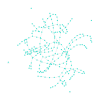

In [5]:
gplot(G)

# Rule 90 - $(1011010)_2$

$$ c' = c_{left} \oplus c_{right} $$

In [6]:
function rule90(initial_state)
    nsteps = length( initial_state )
    states = zeros( Int, nsteps , nsteps )
    states[1,:] .= initial_state
    for t in 1:nsteps-1
        left  = circshift(states[t, :],  1) 
        right = circshift(states[t, :], -1)
        center = states[t, :]
        states[t+1 , : ] = xor.( left , right )
    end
    return states
end

rule90 (generic function with 1 method)

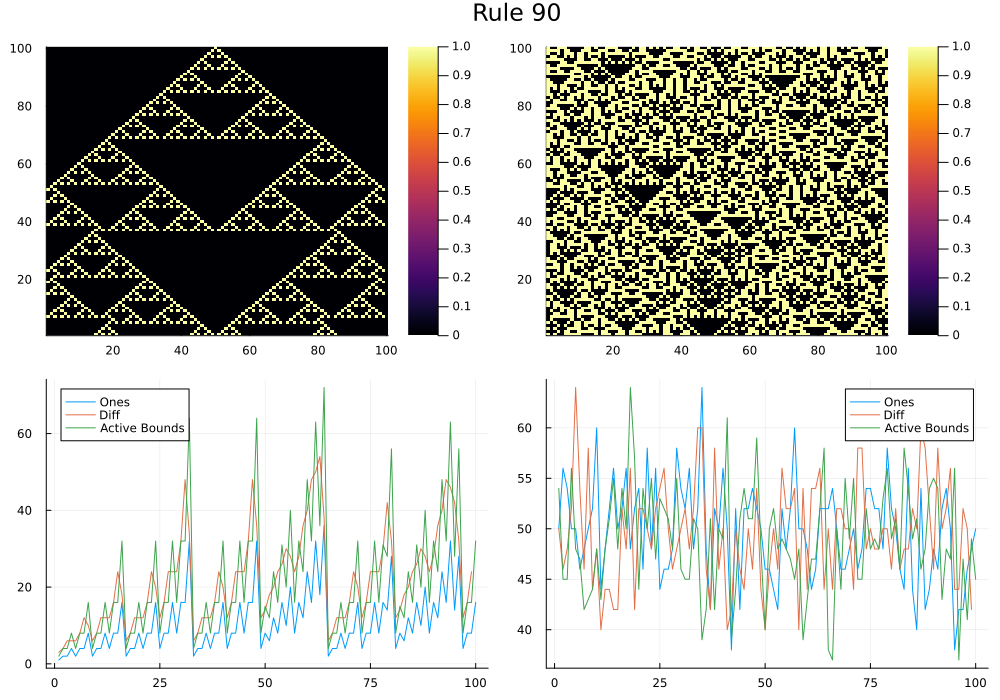

In [7]:
G = Phase_Graph(90)
mkplot(90,100)

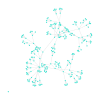

In [8]:
gplot(G)

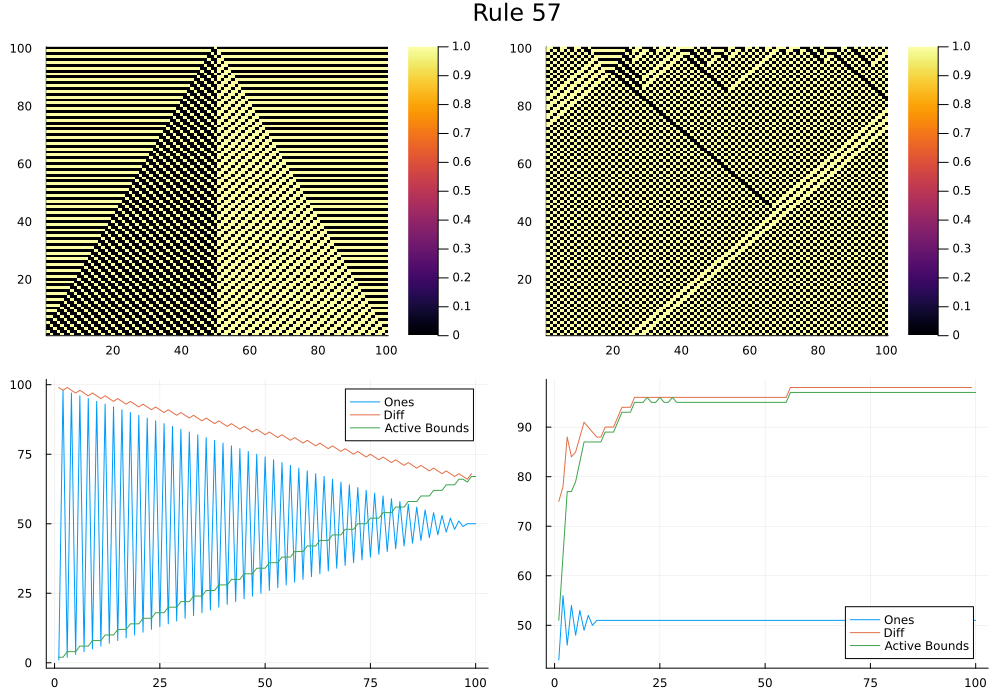

In [9]:
G = Phase_Graph(57)
mkplot(57,100)

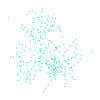

In [10]:
gplot(G)

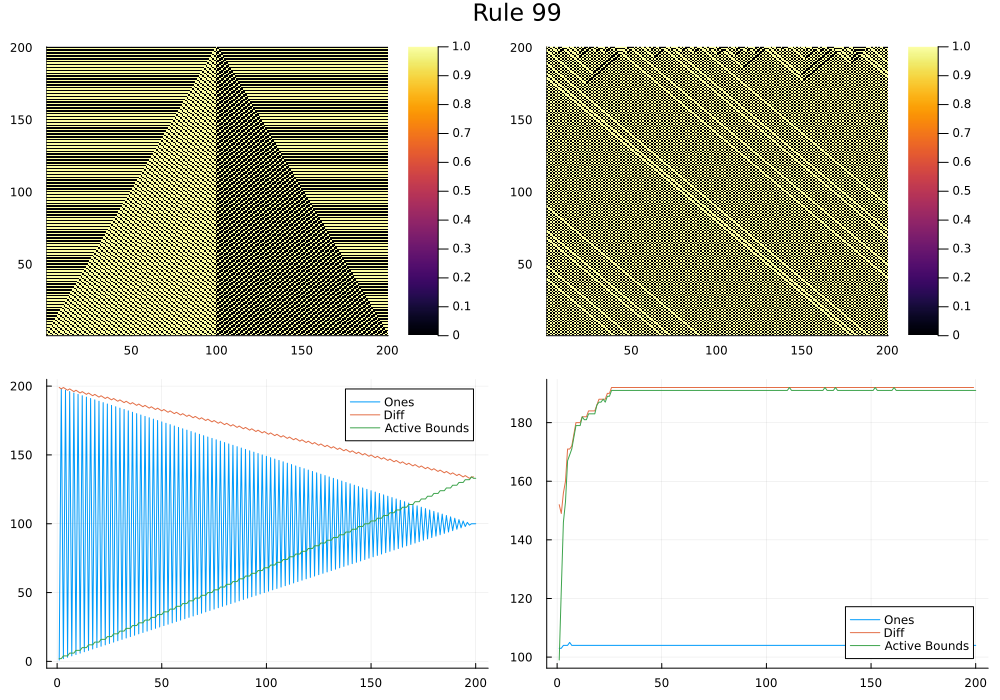

In [11]:
G = Phase_Graph(99)
mkplot( 99 , 200)

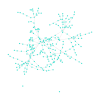

In [12]:
gplot(G)

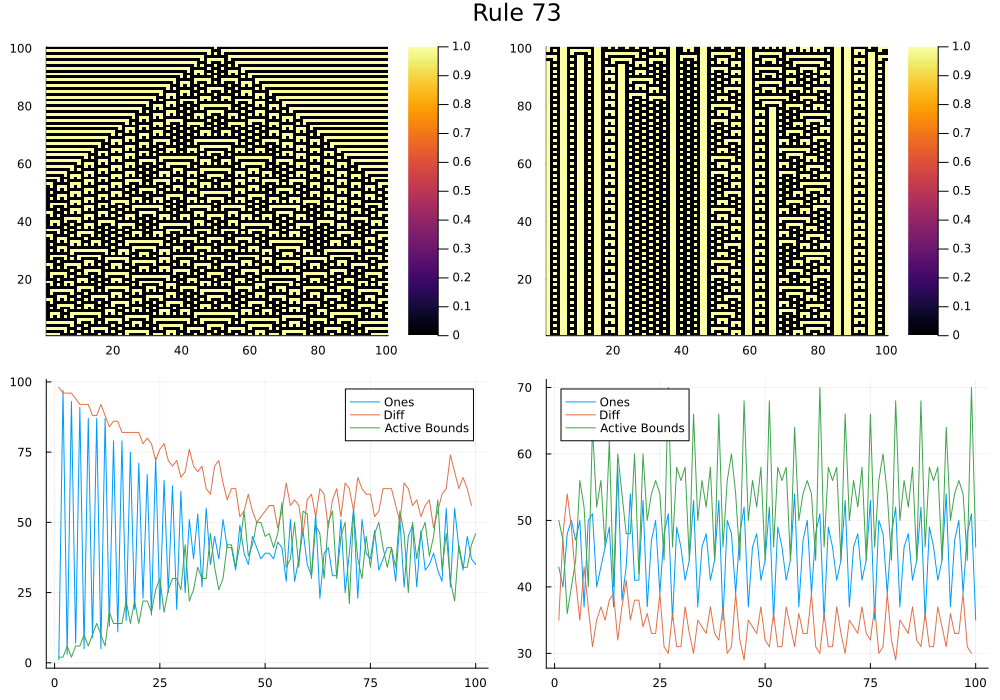

In [13]:
G = Phase_Graph(73)
mkplot( 73 , 100)

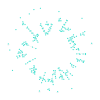

In [14]:
gplot(G)

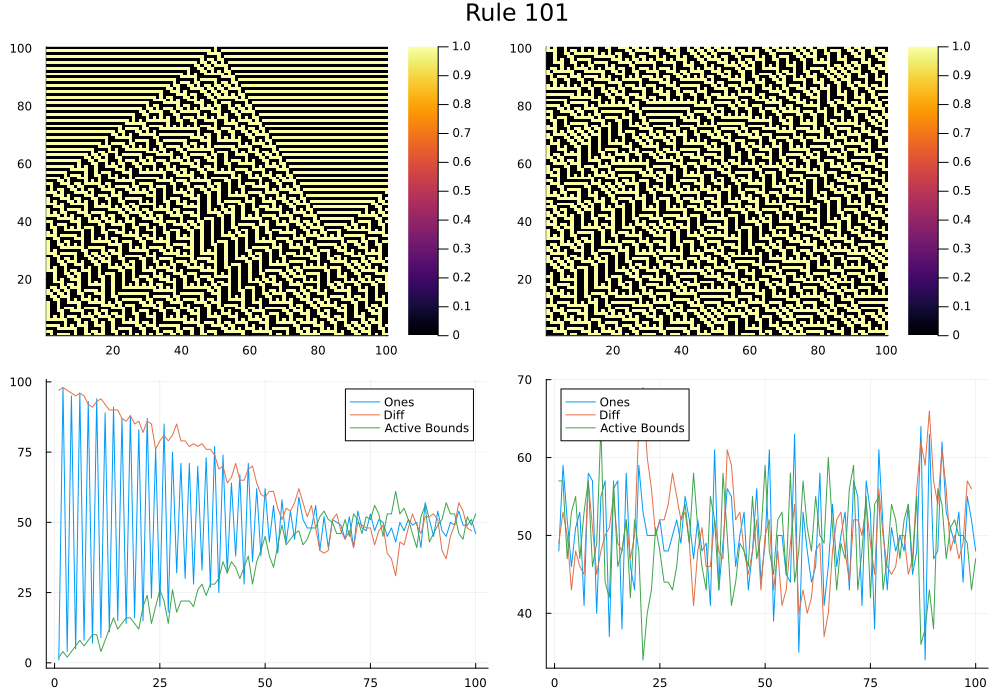

In [15]:
G = Phase_Graph(101)
mkplot( 101 , 100)

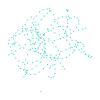

In [16]:
gplot(G)